In [17]:
import sys
import warnings
import datacube
from datacube.storage import masking
from datacube.helpers import ga_pq_fuser
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd
import xarray as xr
from datacube.utils import geometry
from datacube.utils.geometry import CRS
from datacube.helpers import write_geotiff
import os

sys.path.append('../10_Scripts')
import SpatialTools
import gdal
import DEADataHandling
import DEAPlotting

In [18]:
# #2010s snow
snow_sum16 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2016_2018_snow.tif')
snow_sum12 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2010_2012_snow.tif')
snow_sum14 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2013_2015_snow.tif')
snow_sum10s=snow_sum12+snow_sum14+snow_sum16
# #2010s valid
valid_sum16 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2016_2018_valid.tif')
valid_sum12 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2010_2012_valid.tif')
valid_sum14 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2013_2015_valid.tif')
valid_sum10s=valid_sum12+valid_sum14+valid_sum16

In [19]:
# 2000s snow
snow_sum07 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2007_2009_snow.tif')
snow_sum04 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2004_2006_snow.tif')
snow_sum03 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2000_2003_snow.tif')
snow_sum00s=snow_sum03+snow_sum04+snow_sum07
# #2000s valid
valid_sum07 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2007_2009_valid.tif')
valid_sum04 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2004_2006_valid.tif')
valid_sum03 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2000_2003_valid.tif')
valid_sum00s=valid_sum03+valid_sum04+valid_sum07

In [20]:
# 1990s snow
snow_sum97 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/1997_1999_snow.tif')
snow_sum94 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/1994_1996_snow.tif')
snow_sum93 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/1990_1993_snow.tif')
snow_sum90s=snow_sum93+snow_sum94+snow_sum97
# #1990s valid
valid_sum97 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/1997_1999_valid.tif')
valid_sum94 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/1994_1996_valid.tif')
valid_sum93 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/1990_1993_valid.tif')
valid_sum90s=valid_sum93+valid_sum94+valid_sum97

In [21]:
snow_sum80s = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/1987_1989_snow.tif')
valid_sum80s = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/1987_1989_valid.tif')

In [22]:
snow_all = snow_sum10s+snow_sum00s+snow_sum90s+snow_sum80s
valid_all = valid_sum10s+valid_sum00s+valid_sum90s+valid_sum80s
snow_all_prop = snow_all/valid_all

In [23]:
time=pd.read_csv('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/nofimages.txt', header=None)
time.columns=['year', 'count']
time=time.set_index('year')
# time

In [24]:
valid_time10s=time.loc['2016_2018_']+time.loc['2013_2015_']+time.loc['2010_2012_']
valid_time00s=time.loc['2007_2009_']+time.loc['2004_2006_']+time.loc['2000_2003_']
valid_time90s=time.loc['1997_1999_']+time.loc['1994_1996_']+time.loc['1990_1993_']
valid_time80s=time.loc['1987_1989_']


In [25]:
valid_time_all = time['count'].sum()

In [26]:
valid_time_all

1064

In [27]:
valid_prop10s = valid_sum10s / int(valid_time10s)
valid_prop00s = valid_sum00s / int(valid_time00s)
valid_prop90s = valid_sum90s / int(valid_time90s)
valid_prop80s = valid_sum80s / int(valid_time80s)
valid_prop_all = valid_all / valid_time_all

# valid_prop10s

In [23]:
# valid_prop_all.plot()

In [28]:
snow_prop10s = snow_sum10s/valid_sum10s
snow_prop00s = snow_sum00s/valid_sum00s
snow_prop90s = snow_sum90s/valid_sum90s
snow_prop80s = snow_sum80s/valid_sum80s

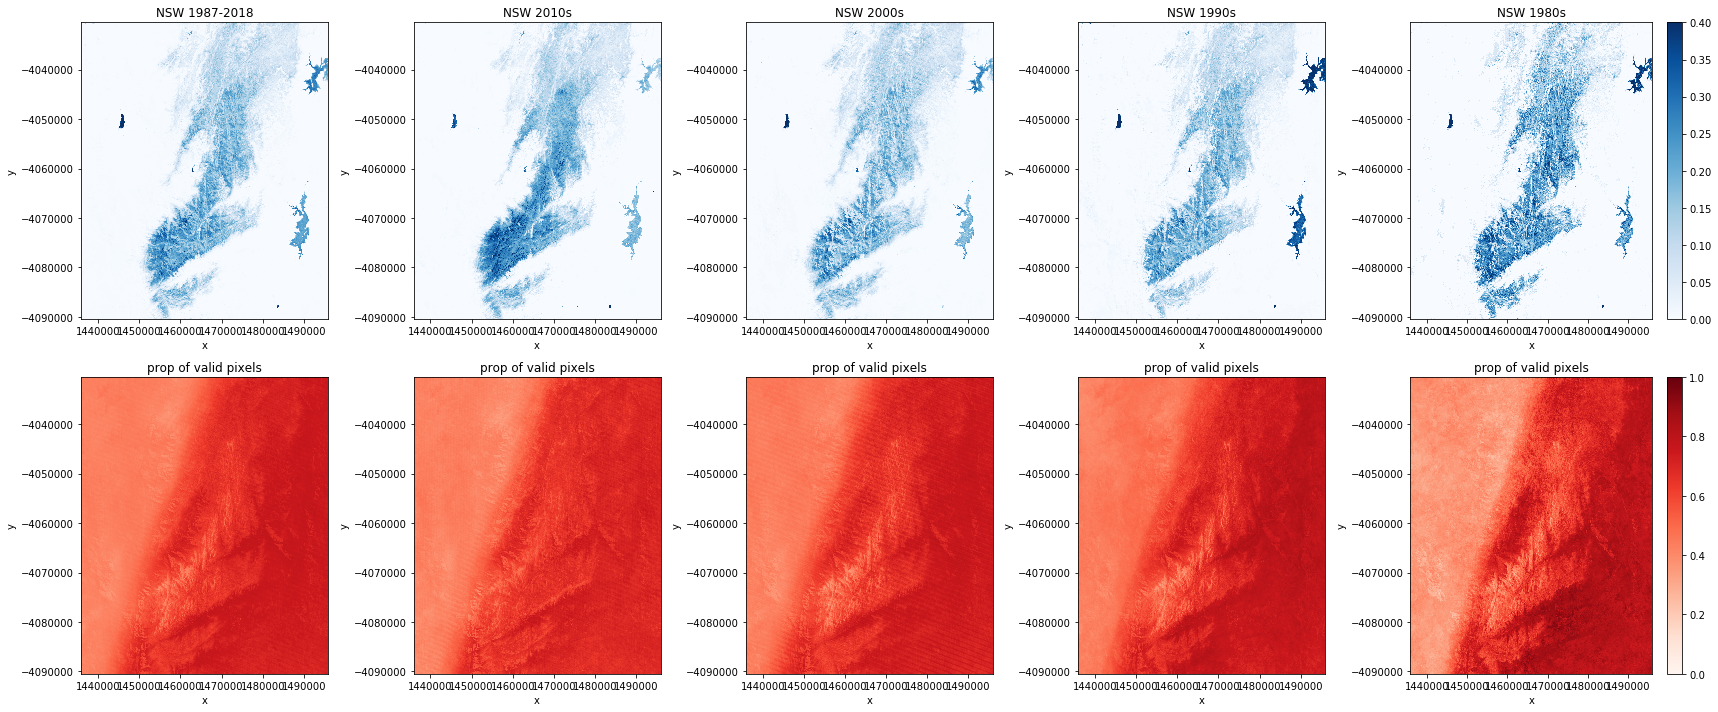

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=5, nrows=2,
                         figsize = (24, 10),
                         gridspec_kw={'width_ratios': [9, 9, 9, 9, 11]})

z=snow_all_prop.plot(ax=axes[0,0], cmap='Blues', add_colorbar=False)
zv=valid_prop_all.plot(cmap='Reds',ax=axes[1,0], add_colorbar=False)
a=snow_prop10s.plot(ax=axes[0,1], cmap='Blues', add_colorbar=False)
av=valid_prop10s.plot(cmap='Reds',ax=axes[1,1], add_colorbar=False)
b=snow_prop00s.plot(ax=axes[0,2], cmap='Blues', add_colorbar=False)
bv=valid_prop00s.plot(cmap='Reds',ax=axes[1,2], add_colorbar=False)
c=snow_prop90s.plot(ax=axes[0,3], cmap='Blues', add_colorbar=False)
cv=valid_prop90s.plot(cmap='Reds',ax=axes[1,3], add_colorbar=False)
d=snow_prop80s.plot(ax=axes[0,4], cmap='Blues')
dv=valid_prop80s.plot(cmap='Reds',ax=axes[1,4])

axes[0,0].set_title('NSW 1987-2018')
axes[0,1].set_title('NSW 2010s')
axes[0,2].set_title('NSW 2000s')
axes[0,3].set_title('NSW 1990s')
axes[0,4].set_title('NSW 1980s')

axes[1,0].set_title('prop of valid pixels')
axes[1,1].set_title('prop of valid pixels')
axes[1,2].set_title('prop of valid pixels')
axes[1,3].set_title('prop of valid pixels')
axes[1,4].set_title('prop of valid pixels')
z.set_clim(0,0.4)
zv.set_clim(0, 1)
a.set_clim(0,0.4)
av.set_clim(0, 1)
b.set_clim(0,0.4)
bv.set_clim(0, 1)
c.set_clim(0,0.4)
cv.set_clim(0, 1)
d.set_clim(0,0.4)
dv.set_clim(0, 1)
plt.tight_layout()
plt.savefig('decade_nsw.png')

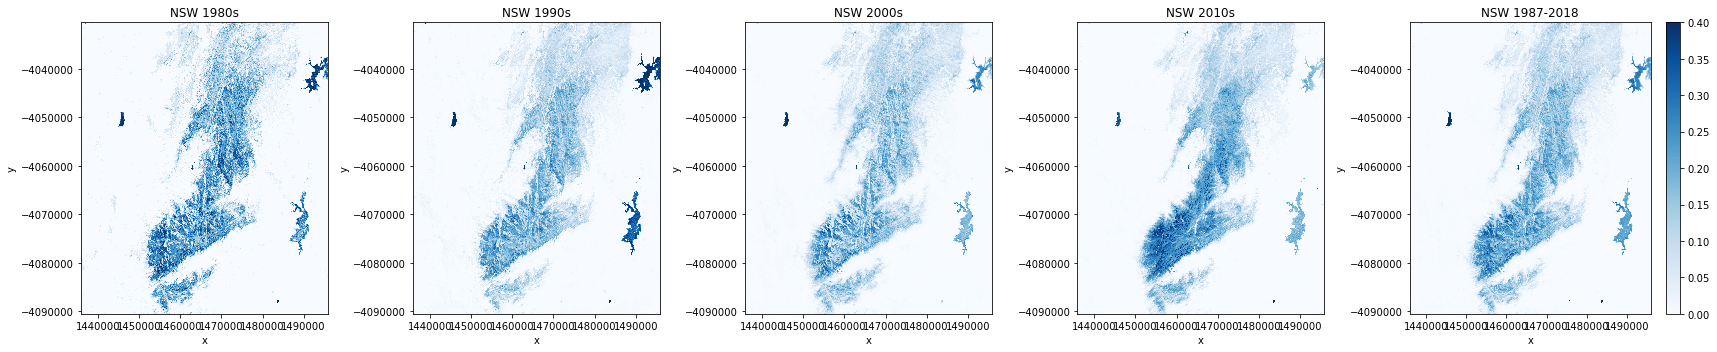

In [30]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=5,
                         figsize = (24, 5),
                         gridspec_kw={'width_ratios': [9, 9, 9, 9, 11]})

z=snow_all_prop.plot(ax=axes[4], cmap='Blues')
a=snow_prop10s.plot(ax=axes[3], cmap='Blues', add_colorbar=False)
b=snow_prop00s.plot(ax=axes[2], cmap='Blues', add_colorbar=False)
c=snow_prop90s.plot(ax=axes[1], cmap='Blues', add_colorbar=False)
d=snow_prop80s.plot(ax=axes[0], cmap='Blues', add_colorbar=False)


axes[4].set_title('NSW 1987-2018')
axes[3].set_title('NSW 2010s')
axes[2].set_title('NSW 2000s')
axes[1].set_title('NSW 1990s')
axes[0].set_title('NSW 1980s')

z.set_clim(0,0.4)
a.set_clim(0,0.4)
b.set_clim(0,0.4)
c.set_clim(0,0.4)
d.set_clim(0,0.4)
plt.tight_layout()
plt.savefig('nsw_snow_decades.png')

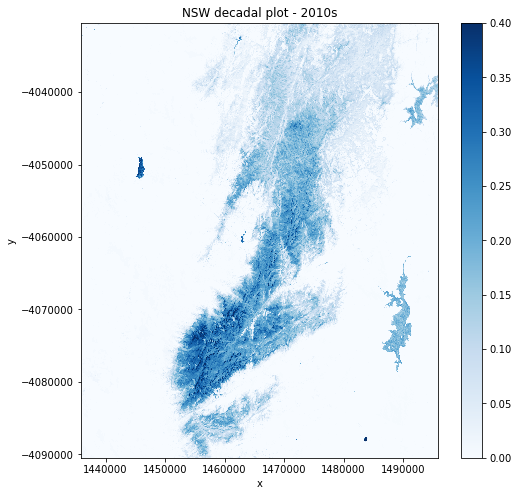

In [39]:
a=snow_prop10s.plot(cmap='Blues', figsize=(8,8))
a.set_clim(0, 0.4)
plt.title('NSW decadal plot - 2010s')
# plt.imshow(a)

plt.savefig('nsw_snow_2010s.png')

In [34]:
snow_sum10s=snow_sum12+snow_sum14+snow_sum16

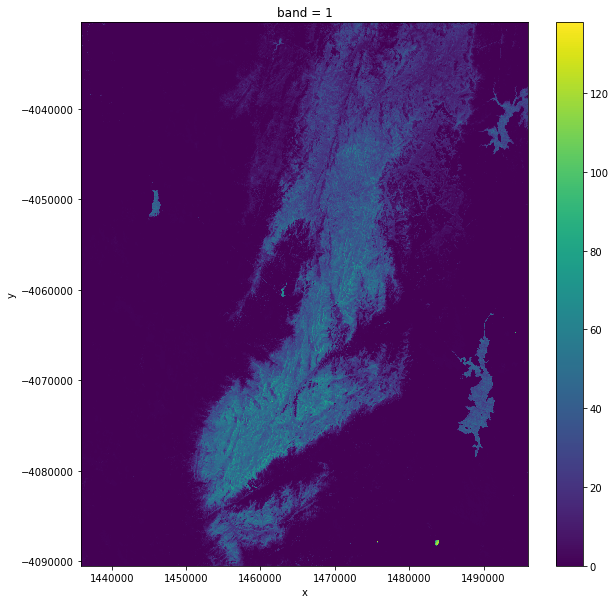

In [37]:
snow_sum10s.plot(figsize=(10, 10))

In [13]:
#2010s valid
valid_sum16 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/decadalvalid.tif')
valid_sum14 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2013_2015_valid.tif')
valid_sum12 = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/2010_2012_valid.tif')

In [14]:
valid_sum10s=valid_sum12+valid_sum14+valid_sum16

In [15]:
snow_prop10s = snow_sum10s/valid_sum10s

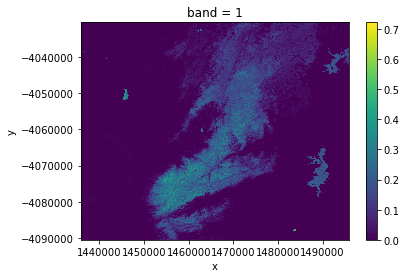

In [17]:
snow_prop10s.plot()

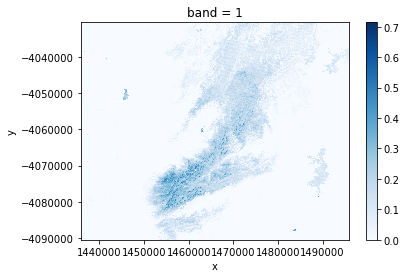

In [4]:
snow_prop.plot(cmap='Blues')

TypeError: 'Text' object is not callable

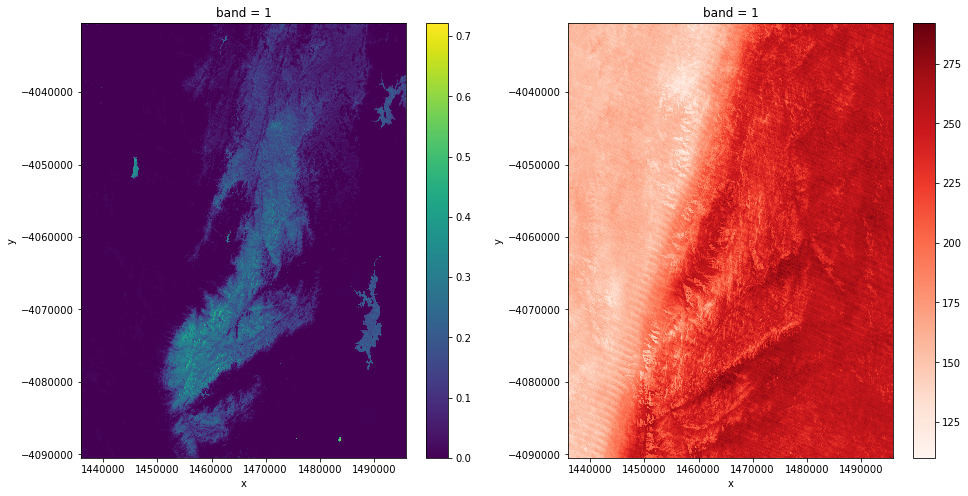

In [24]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, 
                         figsize = (16, 8)
                        )

snow_prop10s.plot(ax=axes[0])
valid_sum10s.plot(cmap='Reds',ax=axes[1])
# axes[0].title('snow')

In [ ]:
plt.savefig('decade_example.png')